In [56]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
DATA_PATH = "/content/drive/MyDrive/blm5121-wm-project/data/bodyPerformance.csv"

In [36]:
df = pd.read_csv(DATA_PATH)

In [37]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


# Data Preprocessing

In [38]:
# renaming columns
columns_to_rename = {
'body fat_%':"body_fat_percent",
'gripForce':"grip_force",
'sit and bend forward_cm':'sit_and_bend_forward_cm',
'sit-ups counts':"sit_ups_counts",
'broad jump_cm':'broad_jump_cm',
}
df.rename(columns=columns_to_rename,inplace=True)

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
for column in df.columns:
    if "cm" in column:
        df[column[:-2]+"m"] = df[column]/100
        df.drop(column,inplace=True,axis=1)

In [41]:
df.sample(random_state=42,n=5)

,age,gender,weight_kg,body_fat_percent,diastolic,systolic,grip_force,sit_ups_counts,class,height_m,sit_and_bend_forward_m,broad_jump_m
10773,21.0,M,71.50,21.1,94.0,138.0,33.0,26.0,D,1.751,0.103,1.82
5496,42.0,M,67.30,18.0,64.0,130.0,48.5,52.0,A,1.623,0.152,2.19
13055,36.0,M,90.50,14.7,87.0,125.0,64.0,45.0,C,1.785,0.264,2.62
11825,29.0,M,85.50,17.7,76.0,122.0,49.5,43.0,D,1.823,0.122,2.54
1326,53.0,M,88.48,35.6,76.0,130.0,36.3,18.0,D,1.773,0.064,1.83


In [43]:
df['bmi'] = df.weight_kg/np.power(df.height_m,2)

In [44]:
siralama =[
'age',
'gender',
'weight_kg',
'height_m',
'bmi',
'body_fat_percent',
'grip_force',
'sit_ups_counts',
'sit_and_bend_forward_m',
'broad_jump_m',
'diastolic',
'systolic',
'class',
]
df = df[siralama]

In [46]:
df.rename(columns={"gender_M":'gender'},inplace=True)
df.gender = df.gender.astype('category')

In [45]:
df = pd.get_dummies( data = df, columns=['gender'], drop_first=True )

In [47]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['encoded_class'] = encode.fit_transform(df['class'])
df.encoded_class =df.encoded_class.astype("category")
# mappings
# A - 0,
# B - 1,
# C - 2,
# D - 3
df.drop(columns=['class'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13392 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     13392 non-null  float64 
 1   weight_kg               13392 non-null  float64 
 2   height_m                13392 non-null  float64 
 3   bmi                     13392 non-null  float64 
 4   body_fat_percent        13392 non-null  float64 
 5   grip_force              13392 non-null  float64 
 6   sit_ups_counts          13392 non-null  float64 
 7   sit_and_bend_forward_m  13392 non-null  float64 
 8   broad_jump_m            13392 non-null  float64 
 9   diastolic               13392 non-null  float64 
 10  systolic                13392 non-null  float64 
 11  gender                  13392 non-null  category
 12  encoded_class           13392 non-null  category
dtypes: category(2), float64(11)
memory usage: 1.3 MB


#EDA

In [51]:
print(df.select_dtypes(exclude=pd.CategoricalDtype).columns.value_counts().sum())
num_cols = df.select_dtypes(exclude=pd.CategoricalDtype).columns.to_list()

11


In [26]:
eda = df.copy()

In [27]:
eda.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body_fat_percent           float64
diastolic                  float64
systolic                   float64
grip_force                 float64
sit_and_bend_forward_cm    float64
sit_ups_counts             float64
broad_jump_cm              float64
class                       object
dtype: object

In [28]:
print(eda.select_dtypes(exclude=pd.CategoricalDtype).columns.value_counts().sum())
# 11 numerical column
num_list = eda.select_dtypes(exclude=pd.CategoricalDtype).columns.to_list()

12


In [58]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'violet',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',

}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

In [84]:
def plotting_bar(x:str,group:str):
    try:
        fig,ax = plt.subplots(1,2,figsize=(20,10),constrained_layout=True)
        ax = ax.ravel()
        if group == 'gender':
            labels = ['female','male']
            name = group
        else:
            labels = ['A',"B","C","D"]
            name = group
        grouped_agg = df.groupby(group)[x].agg(
            [(f"{x}_mean", 'mean'),(f"{x}_deviation", 'std')]).reset_index()

        my_palette = sns.color_palette("husl",4)
        sns.set_theme(style='whitegrid',rc=rc,palette=my_palette)

        sns.barplot(data=grouped_agg, x=group, y=f'{x}_mean', ax=ax[0], palette = my_palette)
        sns.barplot(data=grouped_agg, x=group, y=f'{x}_deviation', ax=ax[1], palette = my_palette)

        ax[0].set_title(f'Calculated Mean {x}',fontdict=font_title)
        ax[0].set_xlabel(f"{name}", fontdict=font_label)
        ax[0].set_ylabel(f"Calculated Mean {x}", fontdict=font_label)
        ax[0].set_xticklabels(labels,rotation=45,fontsize=20)

        ax[1].set_title(f'Calculated Deviation {x}',fontdict=font_title)
        ax[1].set_xlabel(f"{name}", fontdict=font_label)
        ax[1].set_ylabel(f"Calculated Deviation {x}", fontdict=font_label)
        ax[1].set_xticklabels(labels,rotation=45,fontsize=20)

        fig.suptitle(f"Mean & Deviation Bar Plots"
                    ,fontdict=font_fig,fontweight='bold'
                    ,fontsize=40)
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')

In [54]:
df.columns

Index(['age', 'weight_kg', 'height_m', 'bmi', 'body_fat_percent', 'grip_force',
       'sit_ups_counts', 'sit_and_bend_forward_m', 'broad_jump_m', 'diastolic',
       'systolic', 'gender', 'encoded_class'],
      dtype='object')

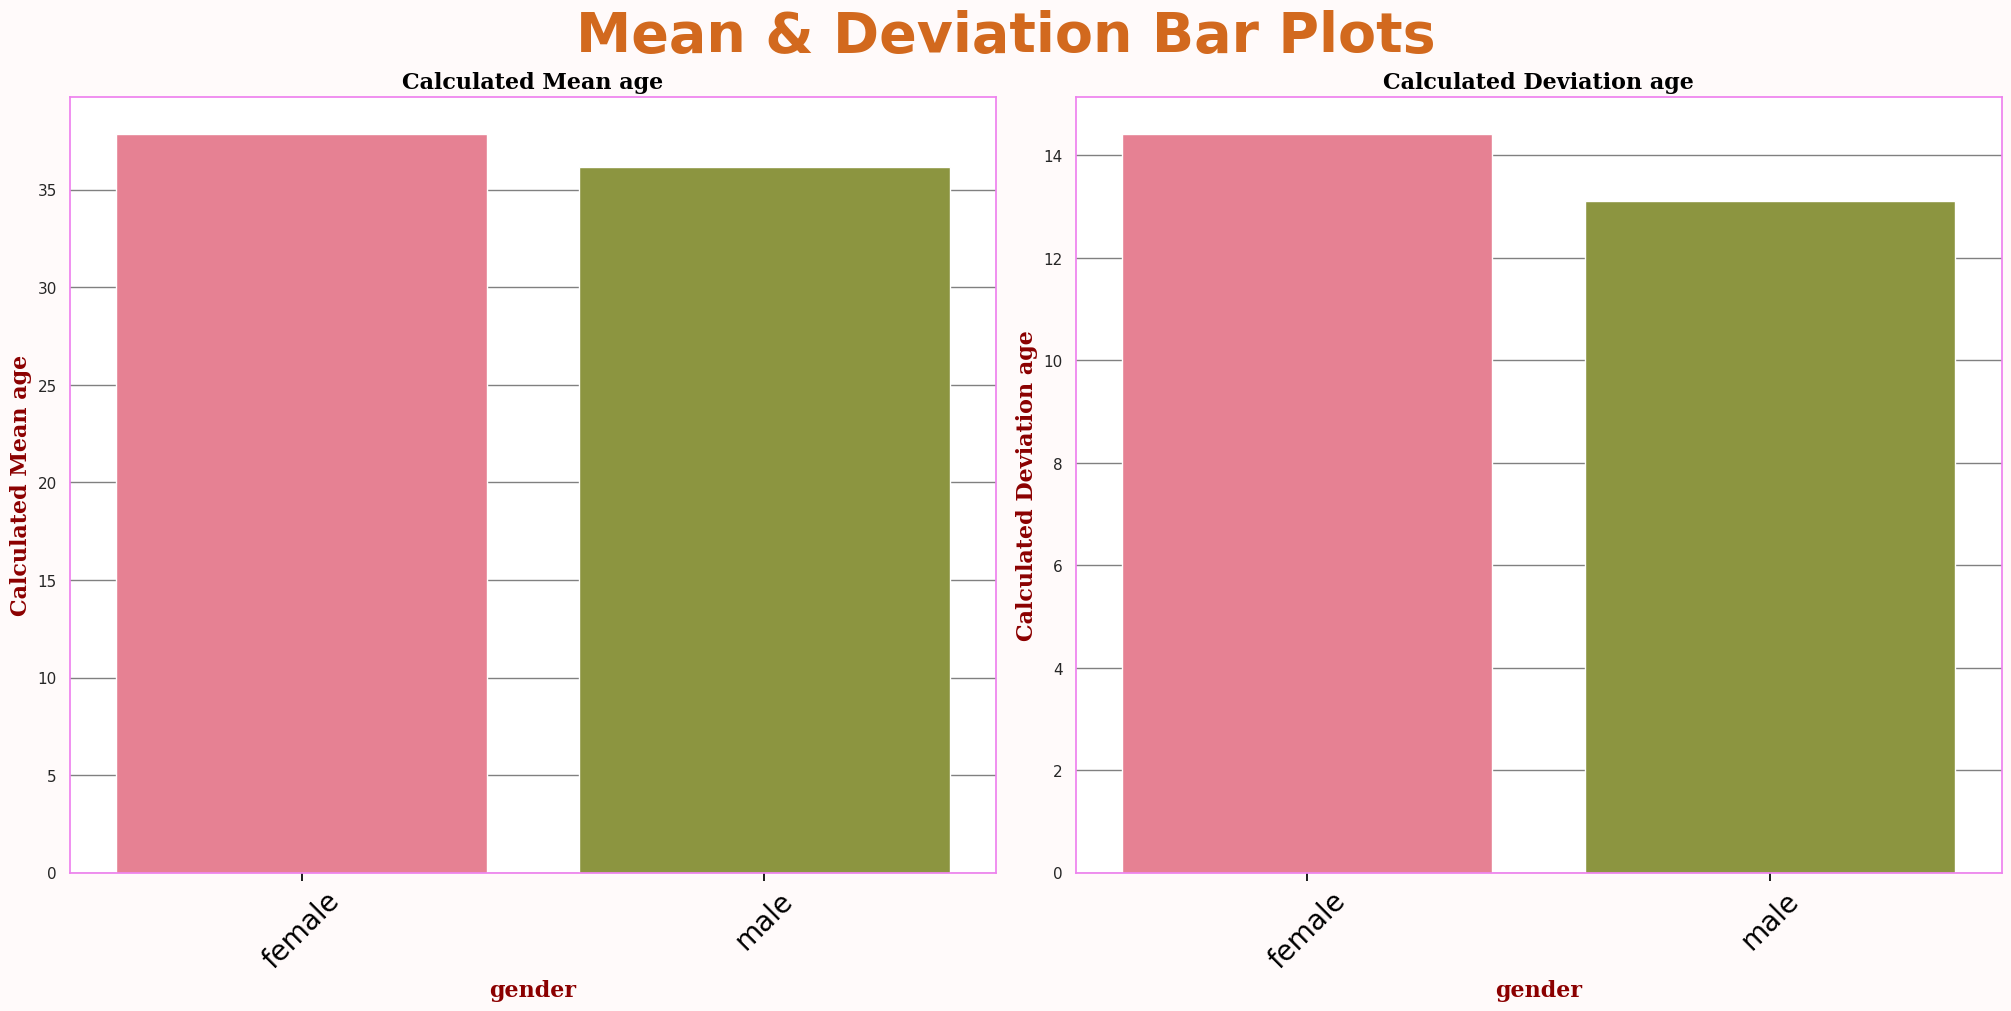

In [86]:
plotting_bar(x= "age",group='gender')

In [97]:
def box_plot(x:str):
    objects = df.select_dtypes(include=pd.CategoricalDtype).columns.to_list()
    try:
        fig,ax = plt.subplots(2, figsize=(30,20))
        sns.set_theme(style='whitegrid',rc=rc,palette='bright')
        ax = ax.ravel()

        for index,value in enumerate(objects):
            sns.boxplot(data=df,y=value,x=x,hue=value,ax=ax[index])
            ax[index].set_title(f'Box plot of {x}',fontdict=font_title)
            ax[index].set_xlabel(f"{x}", fontdict=font_label)
            ax[index].set_ylabel(f"{value}", fontdict=font_label)
            fig.suptitle("Box plots",fontdict=font_fig,fontsize=40,fontweight='bold')
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            eda.info(memory_usage='deep')

In [95]:
num_list

['age',
 'weight_kg',
 'height_m',
 'bmi',
 'body_fat_percent',
 'grip_force',
 'sit_ups_counts',
 'sit_and_bend_forward_m',
 'broad_jump_m',
 'diastolic',
 'systolic']

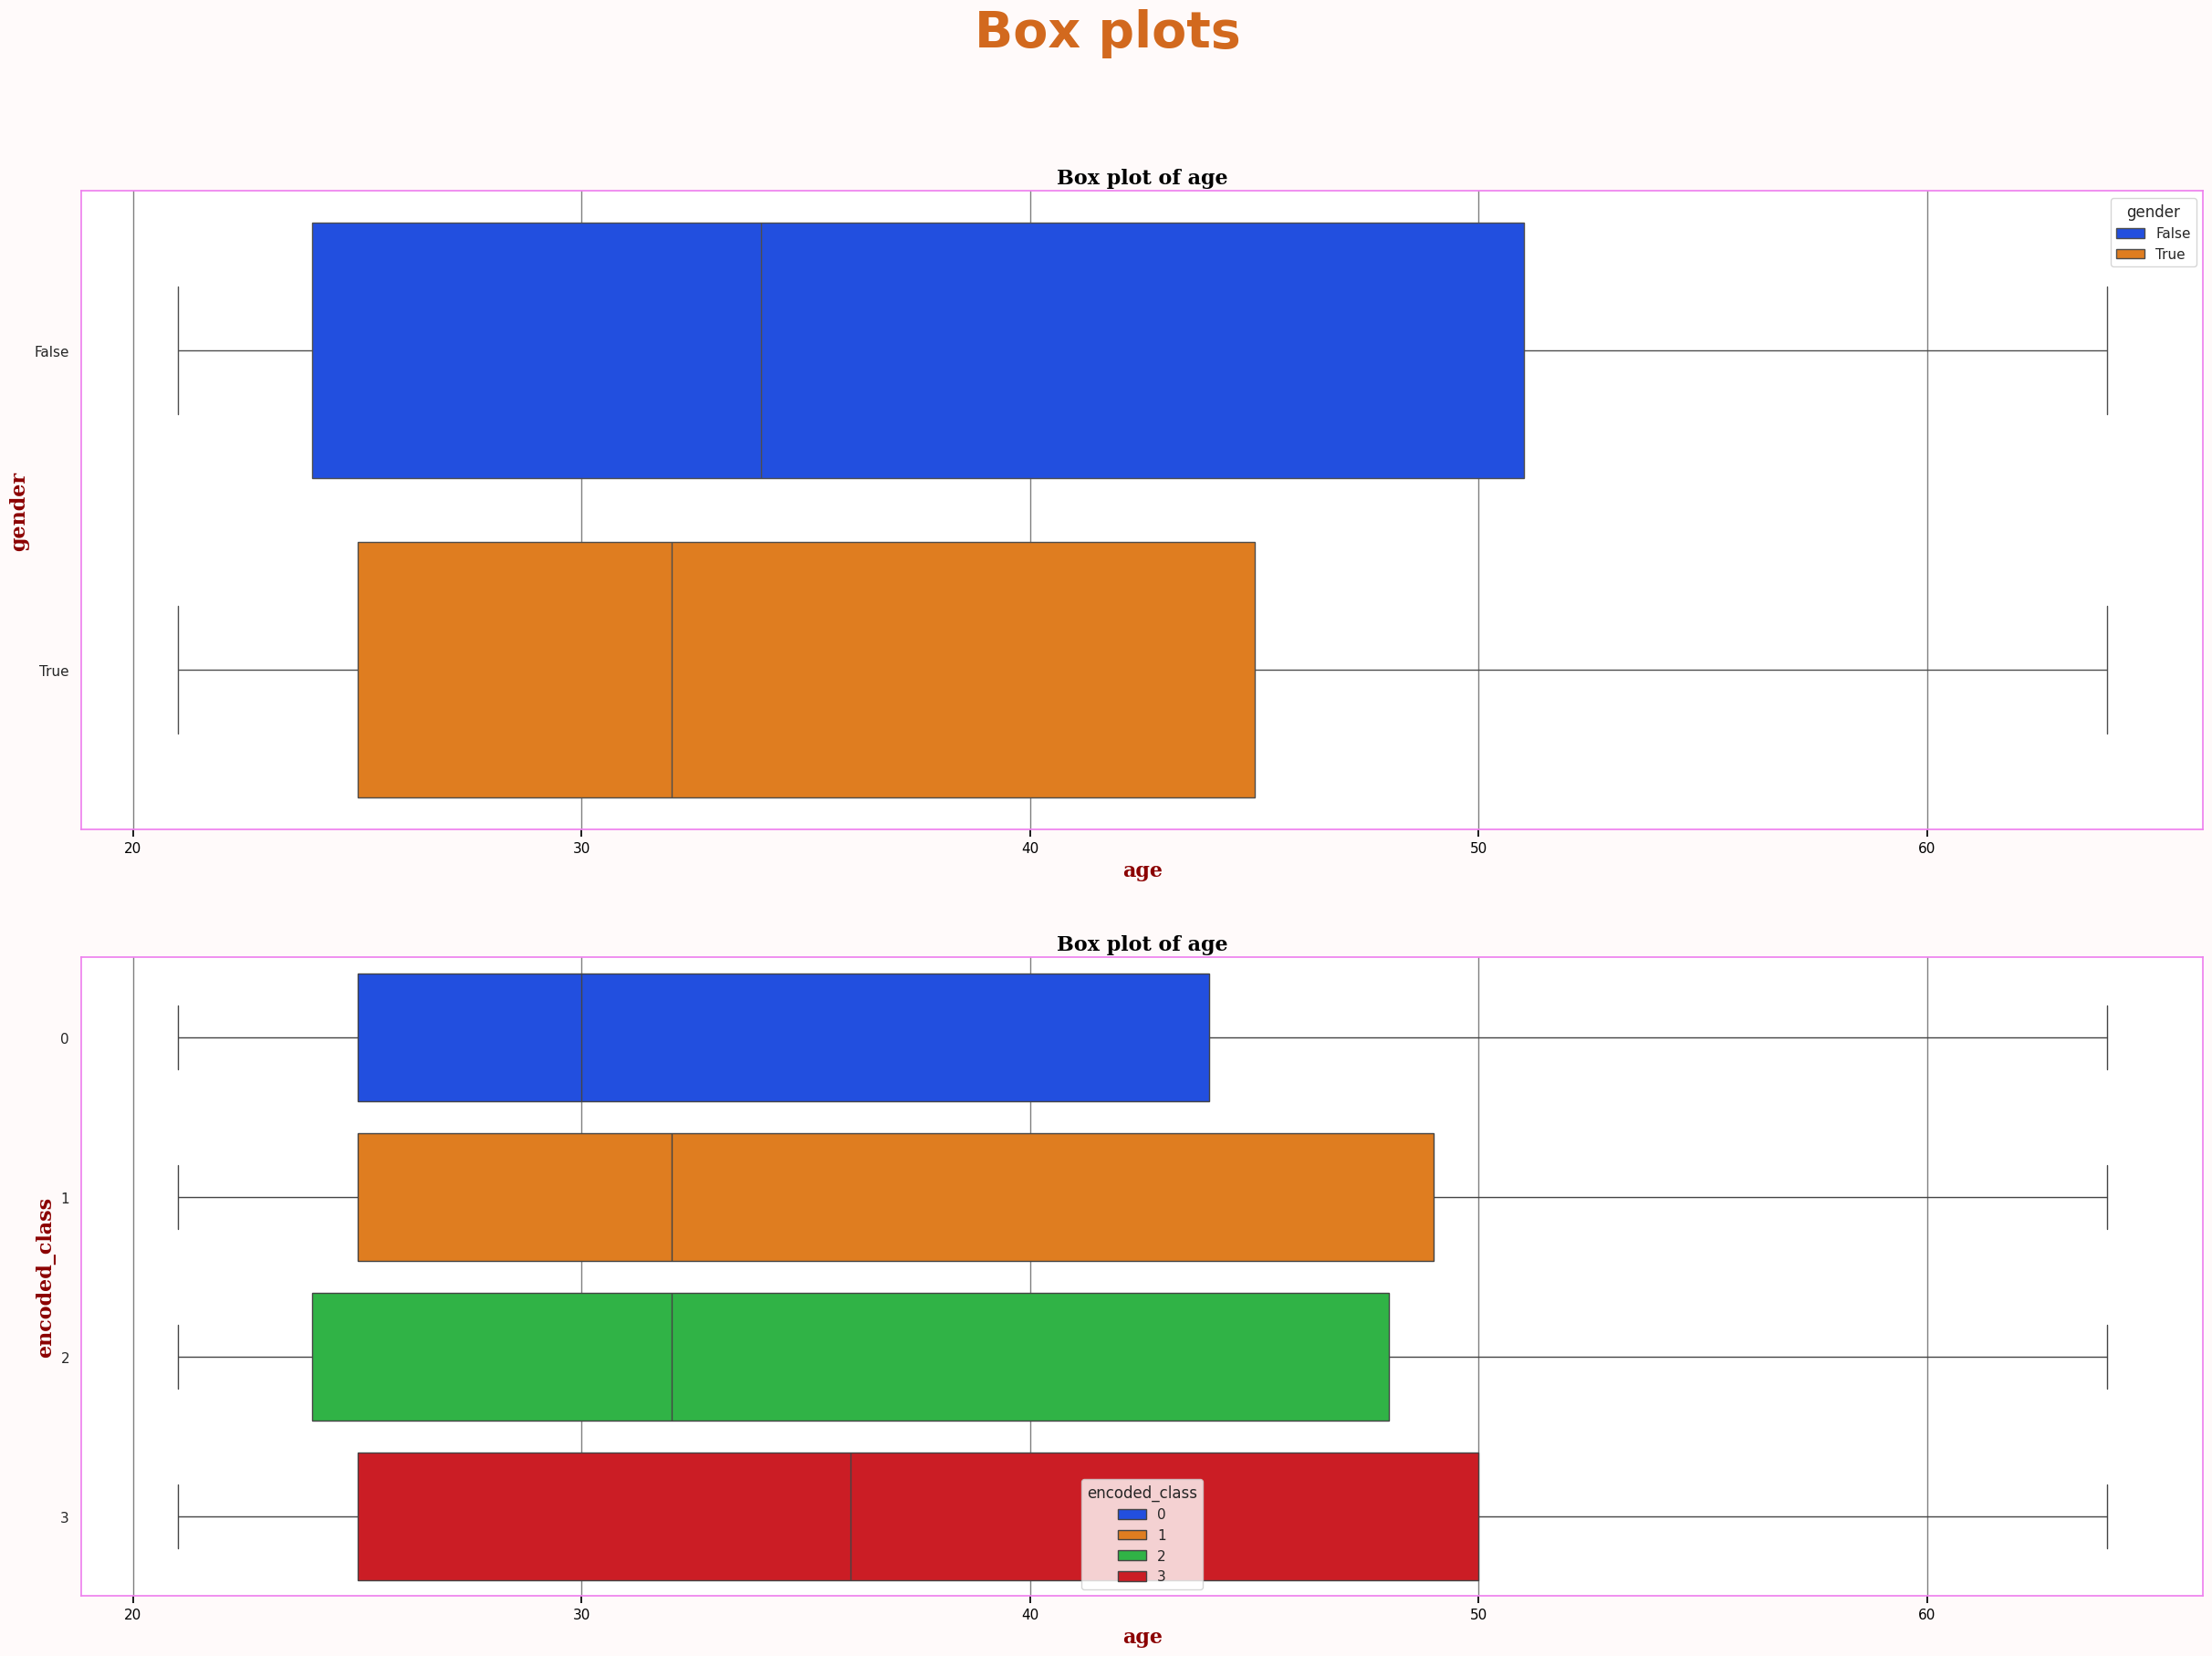

In [98]:
box_plot("age")